# Notebook de mejora

Este notebook es un ejemplo cómo se puede mejorar los hiperparámetros de un algoritmo, y medir la importancia de atributos https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ de la práctica 3 de Inteligencia de Negocio. 

Incluyo el código del notebook anterior, no se explicarán.

Es un ejemplo que es claramente mejorable, se deja a el/la estudiante el mejorarlo para obtener mejores resultados.

## Código del Notebook anterior

Ahora incluyo todo el código del otro Notebook para poder ejecutarlo fácilmente (muy mejorable).

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv", na_values="NaN") # Definimos na_values para identificar bien los valores perdidos


if 'Id' in train:
    train.drop('Id', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

test = pd.read_csv("test.csv", na_values="NaN")
test_ids = test.Id
test = test.drop('Id', axis=1)

input_all = pd.concat([train.drop('SalePrice', axis=1), test])

col_cat = list(input_all.select_dtypes(exclude=np.number).columns)

from sklearn.impute import SimpleImputer

# Valores categóricos por el más frecuente
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(input_all[col_cat])
train[col_cat] = imputer_cat.transform(train[col_cat])
test[col_cat] = imputer_cat.transform(test[col_cat])

# Valores numéricos por la media
col_num = list(train.select_dtypes(include=np.number).columns)
col_num.remove('SalePrice')
imputer_num = SimpleImputer(strategy="median")
imputer_num.fit(input_all[col_num])
train[col_num] = imputer_num.transform(train[col_num])
test[col_num] = imputer_num.transform(test[col_num])

from sklearn.preprocessing import LabelEncoder
labelers = {}
test_l = test.copy()
train_l = train.copy()

for col in col_cat:
    labelers[col] = LabelEncoder().fit(input_all[col])
    test_l[col] = labelers[col].transform(test[col])
    train_l[col] = labelers[col].transform(train[col])


y_train = train_l.SalePrice
X_train = train_l.drop('SalePrice', axis=1)

if 'Id' in test_l:
    test_l.drop('Id', axis=1, inplace=True)

X_test = test_l

## Aplico modelo

Voy a aplicar un modelo más completo, un Random Forest.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(5, shuffle=True, random_state=124345)
model = RandomForestRegressor(criterion='squared_error', max_depth=10)
values = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(values)
print(values.mean())

[-0.02016876 -0.01855472 -0.02264973 -0.02306619 -0.02449701]
-0.021787282053097233


# Visualizando la Importancia

Vamos a visualizar la importancia de los parámetros. En scikit-learn muchos modelos la calculan, así que es fácil.



Primero entreno con el conjunto de entrenamiento (cross_val_score deja el modelo sin aprender).

In [3]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

Ahora muestro la importancia. en model.feature_importances_ aparece la importancia, y en model.feature_names_in sus nombres.

In [4]:
df_imp = pd.DataFrame({'name': model.feature_names_in_, 'importance': model.feature_importances_})

In [5]:
import seaborn as sns

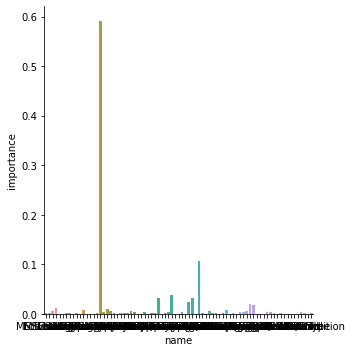

In [6]:
sns.catplot(data=df_imp, x='name', y='importance', kind='bar')

No se vé bien, vamos a ver las N primeras.

In [7]:
N_features = 10

Obtengo los índices para que estén ordenados.

In [8]:
ind_sort = np.argsort(model.feature_importances_)

In [9]:
ind_sort

array([ 8, 73,  4, 38, 74, 63, 71, 44, 72, 62, 13,  5, 41, 47, 68, 14, 30,
       70, 64, 21, 27, 54, 28, 51, 34, 77, 39, 56, 10, 12, 15, 67, 35, 69,
       46, 49, 20,  9,  0, 23, 76, 24,  1, 50, 78,  7, 31, 22,  6, 32, 55,
       52, 40, 26, 57, 75, 17, 66, 65, 36, 29, 58, 59, 48,  2, 25, 19, 11,
       53, 18,  3, 61, 60, 42, 33, 43, 37, 45, 16], dtype=int64)

In [10]:
model.feature_importances_[ind_sort]

array([0.00000000e+00, 2.62915465e-06, 1.26507252e-05, 5.43831171e-05,
       5.61597962e-05, 7.85614710e-05, 8.03186095e-05, 8.55995470e-05,
       1.05787205e-04, 1.10115662e-04, 1.11752578e-04, 1.50981477e-04,
       1.54483185e-04, 1.61773518e-04, 1.75513224e-04, 2.55170385e-04,
       2.55447628e-04, 3.03903663e-04, 3.17025213e-04, 3.27993874e-04,
       3.54149790e-04, 3.76269711e-04, 3.92597518e-04, 4.39071431e-04,
       4.84332941e-04, 5.38703097e-04, 5.72581369e-04, 5.79980802e-04,
       5.82987544e-04, 6.00423832e-04, 6.13419776e-04, 6.15756100e-04,
       6.59590132e-04, 6.94232846e-04, 7.76037131e-04, 8.58791037e-04,
       9.01977654e-04, 1.13612057e-03, 1.14802426e-03, 1.14951490e-03,
       1.17178503e-03, 1.28025429e-03, 1.50390284e-03, 1.60151722e-03,
       1.64013487e-03, 1.64100485e-03, 1.72490615e-03, 1.84911274e-03,
       1.93497189e-03, 1.94958608e-03, 2.40515903e-03, 2.57998316e-03,
       3.36390539e-03, 3.41611424e-03, 3.51609007e-03, 3.83862213e-03,
      

Me interesa invertir el orden

In [11]:
ind_sort = ind_sort[::-1]

In [12]:
model.feature_importances_[ind_sort]

array([5.91097848e-01, 1.07579485e-01, 3.71098949e-02, 3.20672783e-02,
       3.09320856e-02, 2.33075149e-02, 1.98412508e-02, 1.76167763e-02,
       1.18271953e-02, 9.06611422e-03, 8.05589254e-03, 6.91537586e-03,
       6.56355240e-03, 5.60216383e-03, 5.45794999e-03, 5.29925052e-03,
       4.73406072e-03, 4.58726666e-03, 4.33185211e-03, 4.14807015e-03,
       4.14174593e-03, 4.11827764e-03, 3.90723581e-03, 3.83862213e-03,
       3.51609007e-03, 3.41611424e-03, 3.36390539e-03, 2.57998316e-03,
       2.40515903e-03, 1.94958608e-03, 1.93497189e-03, 1.84911274e-03,
       1.72490615e-03, 1.64100485e-03, 1.64013487e-03, 1.60151722e-03,
       1.50390284e-03, 1.28025429e-03, 1.17178503e-03, 1.14951490e-03,
       1.14802426e-03, 1.13612057e-03, 9.01977654e-04, 8.58791037e-04,
       7.76037131e-04, 6.94232846e-04, 6.59590132e-04, 6.15756100e-04,
       6.13419776e-04, 6.00423832e-04, 5.82987544e-04, 5.79980802e-04,
       5.72581369e-04, 5.38703097e-04, 4.84332941e-04, 4.39071431e-04,
      

Ahora escojo solo los primeros N.

In [13]:
ind_sort = ind_sort[:N_features]

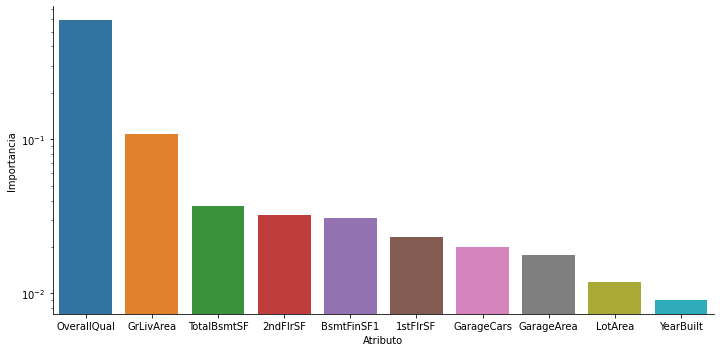

In [14]:
df_imp2 = pd.DataFrame({'name': model.feature_names_in_[ind_sort], 'importance': model.feature_importances_[ind_sort]})
g = sns.catplot(data=df_imp2, x='name', y='importance', kind='bar', aspect=2)
g.set(xlabel='Atributo', ylabel='Importancia', yscale='log')

# Aplicando tuning automático

Vamos a aplicar un GridSearchCV para mejorar dos parámetros del RF:

- max_depth: de 7 a 15.
- criterion: squared_error (hay otros absolute_error o friedman_mse pero no aplico por temas de tiempo ahora mismo).

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = { 
    'max_depth' : [7, 10, 15],
    'criterion' :['squared_error']#, 'absolute_error', 'friedman_mse']
}

Se puede ver que se pueden asignar distintos valores, él va a probar con GridSearchCV todas las combinaciones. Puede mirar la documentación y otras posibles opciones en https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Ahora creamos un modelo que englobe al anterior, y en éste cuando haga el fit probará la mejor combinación.

In [20]:
tuned_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_log_error')

Medimos de nuevo.

In [21]:
tuned_values = cross_val_score(tuned_model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(tuned_values)
print(tuned_values.mean())

[-0.01978427 -0.01856293 -0.02276677 -0.02275795 -0.02407826]
-0.02159003464453672


He incluído los valores por defecto para asegurar que no empeore.

Ahora vamos a entrenar con todo el conjunto de entrenamiento

In [22]:
tuned_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=10),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [7, 10, 15]},
             scoring='neg_mean_squared_log_error')

Veamos los resultados obtenidos:

In [23]:
tuned_model.best_params_

{'criterion': 'squared_error', 'max_depth': 15}

In [24]:
tuned_model.best_estimator_

RandomForestRegressor(max_depth=15)

Vamos a medir la importancia del modelo.

Ahora predigo.

In [25]:
pred = tuned_model.predict(X_test)

Es lo mismo que predecir con el mejor modelo encontrado

In [26]:
pred2 = tuned_model.best_estimator_.predict(X_test)
np.all(pred==pred2)

True

In [29]:
tuned_values = cross_val_score(tuned_model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(tuned_values)
print(tuned_values.mean())

[-0.02004626 -0.01923601 -0.02141666 -0.02317475 -0.02499025]
-0.021772786370284535


In [27]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred})

In [28]:
salida.to_csv("Prueba2.csv", index=False)